In [56]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
library(ggplot2)
library(data.table)
library(tidyverse)
library(dplyr)

#install.packages()
#resource https://blog.princehonest.com/stat-learning/

In [57]:
#Exercise 3 (p.414, Chap.10),
set.seed(123)
x = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
x

1,4
1,3
0,4
5,1
6,2
4,0


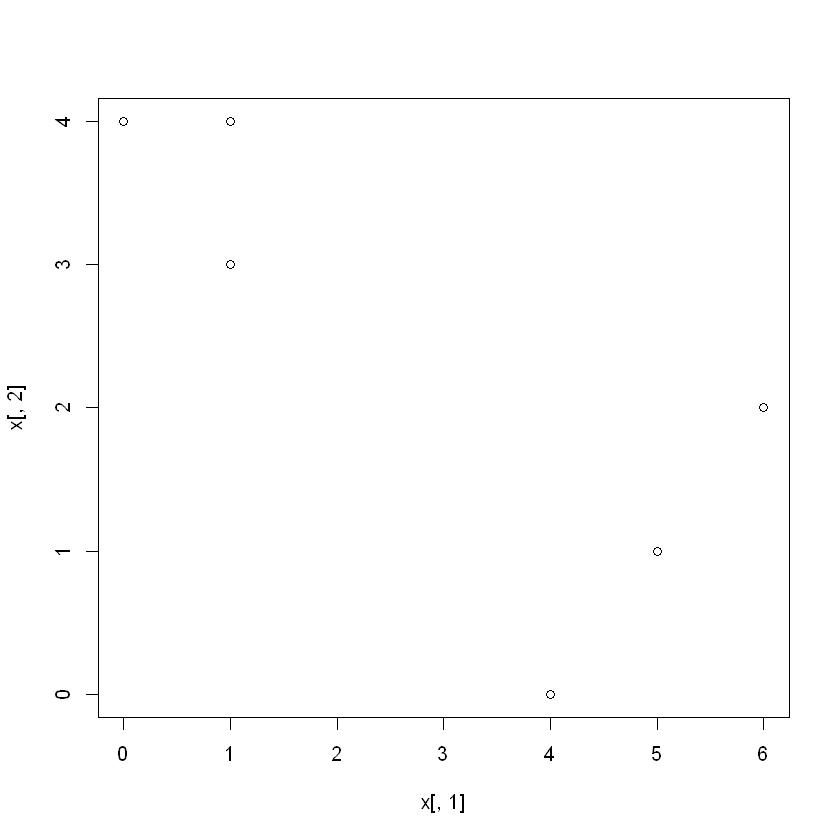

In [58]:
#a.
plot(x[,1], x[,2])

In [59]:
#b.
set.seed(123)
cluster_label = sample(2, nrow(x), replace=T)
cluster_label

[1] 1 1 1 2 1 2

In [60]:
#c.
centroid1 = c(mean(x[cluster_label==1, 1]), mean(x[cluster_label==1, 2]))
centroid2 = c(mean(x[cluster_label==2, 1]), mean(x[cluster_label==2, 2]))
centroid2

[1] 4.5 0.5

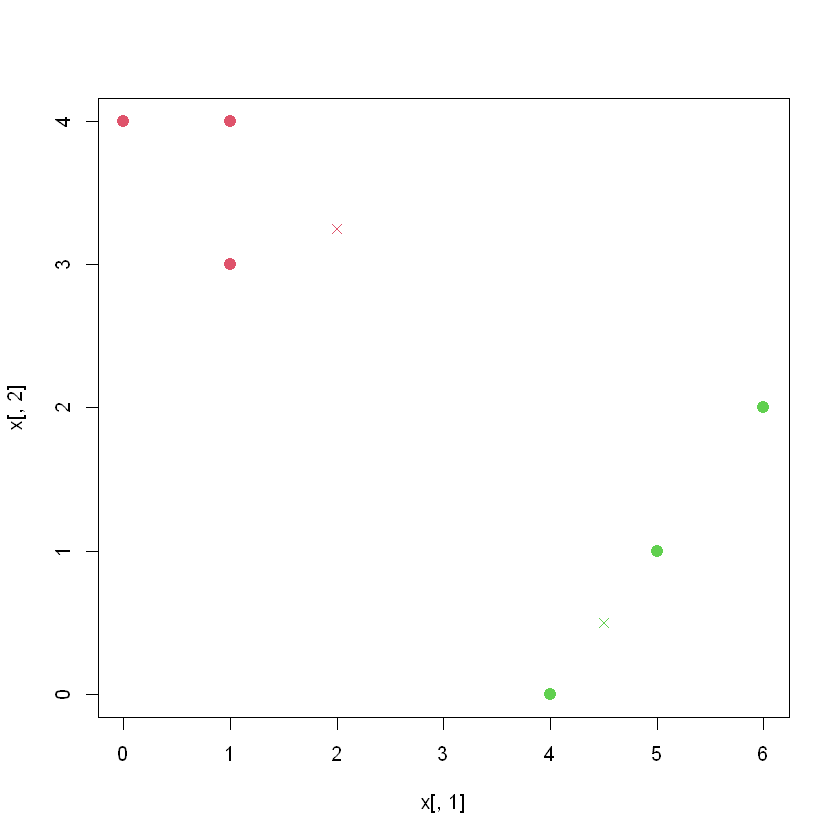

In [61]:
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [62]:
euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(x, centroid1, centroid2) {
  labels = rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (euclid(x[i,], centroid1) < euclid(x[i,], centroid2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}

In [63]:
labels = assign_labels(x, centroid1, centroid2)
labels

[1] 1 1 1 2 2 2

In [64]:
#e.
last_labels = rep(-1, 6)
while (!all(last_labels == labels)) {
  last_labels = labels
  centroid1 = c(mean(x[labels==1, 1]), mean(x[labels==1, 2]))
  centroid2 = c(mean(x[labels==2, 1]), mean(x[labels==2, 2]))
  print(centroid1)
  print(centroid2)
  labels = assign_labels(x, centroid1, centroid2)
}
labels

[1] 0.6666667 3.6666667
[1] 5 1


[1] 1 1 1 2 2 2

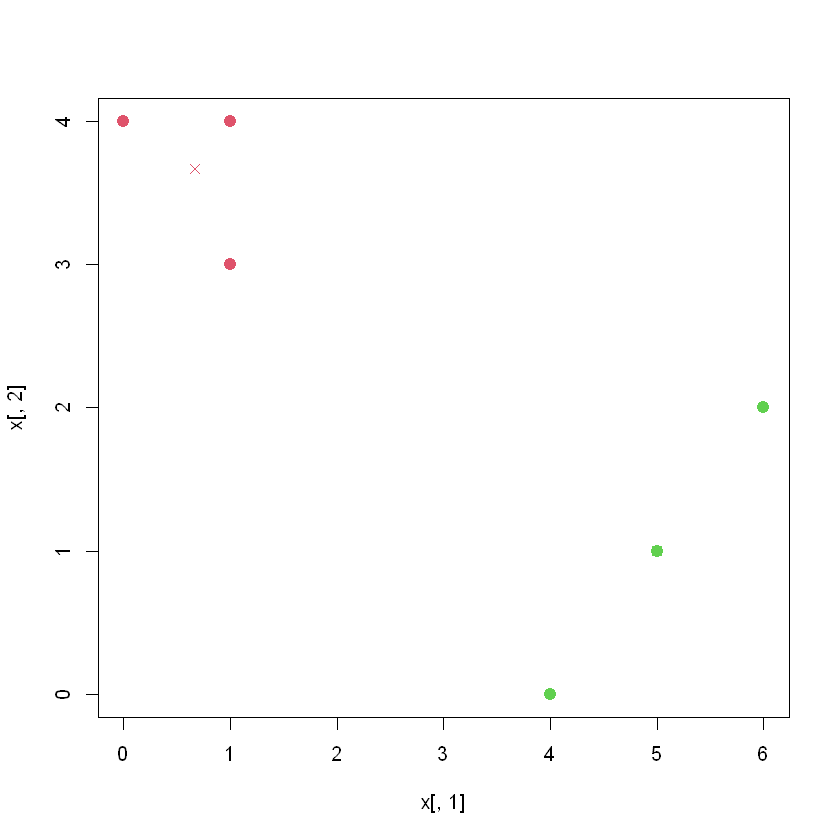

In [65]:
#f.
plot(x[,1], x[,2], col=(labels+1), pch=20, cex=2)
points(centroid1[1], centroid1[2], col=2, pch=4)
points(centroid2[1], centroid2[2], col=3, pch=4)

In [66]:
#Exercise 8 (p.416, Chap.10),
#a.
set.seed(123)
pr.out = prcomp(USArrests, center=T, scale=T)
pr.var = pr.out$sdev^2
pve = pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [67]:
#b.
loadings = pr.out$rotation
pve2 = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2
#same results in both the parts as expected by question

[1] 0.62006039 0.24744129 0.08914080 0.04335752

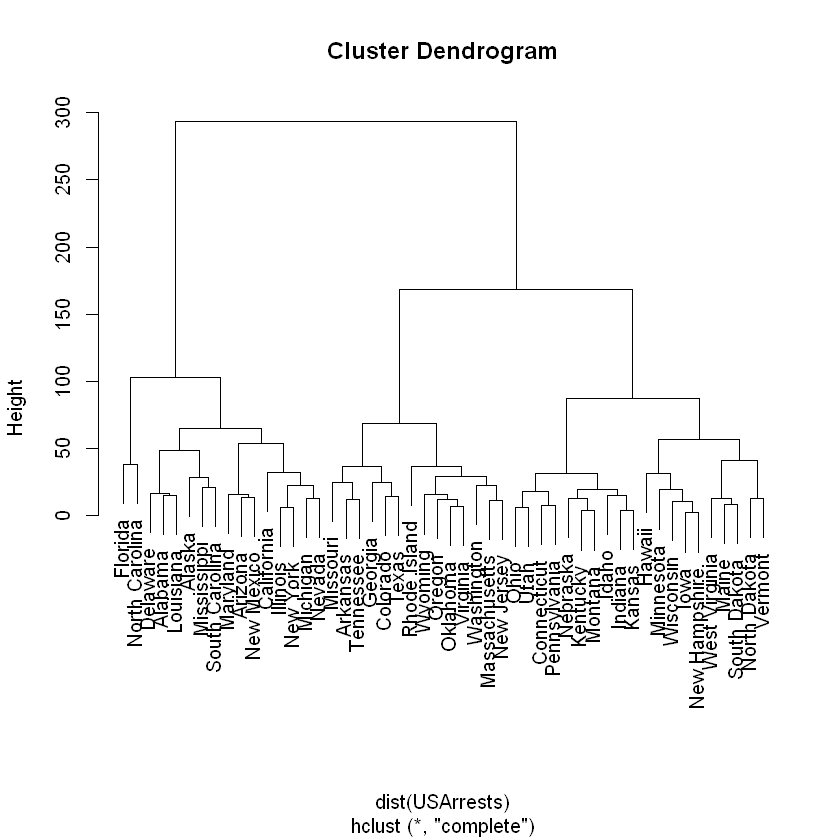

In [68]:
#Exercise 9 (p.416, Chap.10)
#a.
set.seed(123)
hc.complete = hclust(dist(USArrests), method="complete")
plot(hc.complete)

In [69]:
#b.
head(data.frame(cutree(hc.complete, 3)))

,cutree.hc.complete..3.
,<int>
Alabama,1
Alaska,1
Arizona,1
Arkansas,2
California,1
Colorado,2


In [70]:
data.frame(table(cutree(hc.complete, 3)))

Var1,Freq
<fct>,<int>
1,16
2,14
3,20


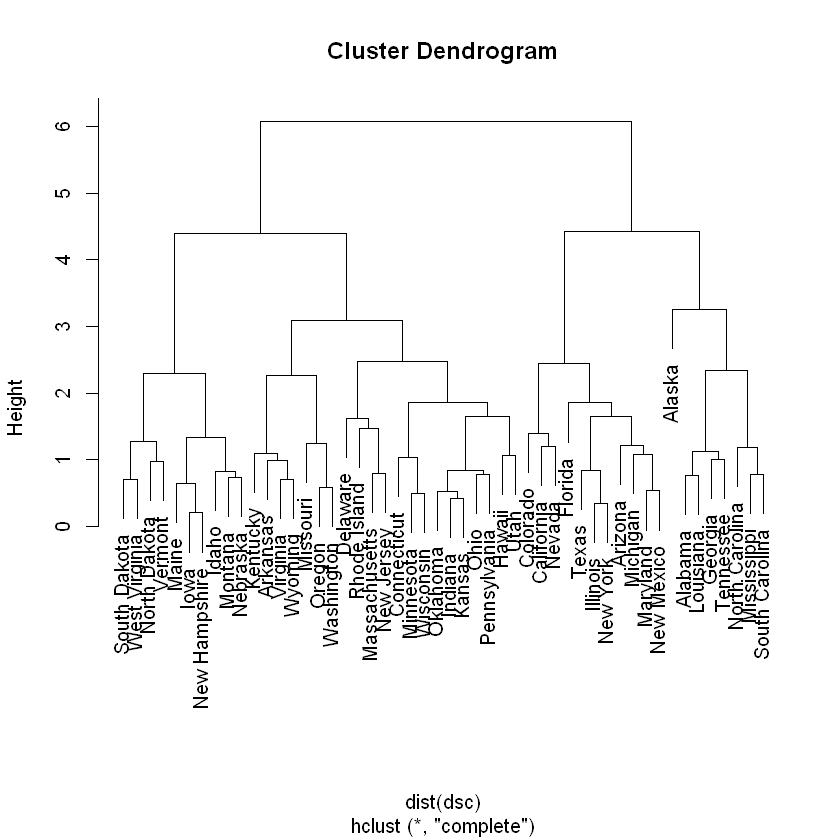

In [71]:
#c.
dsc = scale(USArrests)
hc.s.complete = hclust(dist(dsc), method="complete")
plot(hc.s.complete)

In [72]:
#d.
head(data.frame(cutree(hc.s.complete, 3)))

,cutree.hc.s.complete..3.
,<int>
Alabama,1
Alaska,1
Arizona,2
Arkansas,3
California,2
Colorado,2


In [73]:
data.frame(table(cutree(hc.s.complete, 3)))

Var1,Freq
<fct>,<int>
1,8
2,11
3,31


In [74]:
data.frame(table(cutree(hc.s.complete, 3), cutree(hc.complete, 3)))

Var1,Var2,Freq
<fct>,<fct>,<int>
1,1,6
2,1,9
3,1,1
1,2,2
2,2,2
3,2,10
1,3,0
2,3,0
3,3,20


In [75]:
#Exercise 10 (p.417, Chap.10),
#a.
set.seed(123)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

In [76]:
#b.
pca.out = prcomp(x)
summary(pca.out)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.008 0.5823 0.001858 0.001718 0.001669 0.001658
Proportion of Variance 0.750 0.2500 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001627 0.001542 0.001463 0.001408 0.001356 0.001313
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     0.001284 0.001257 0.001202 0.001139 0.001129 0.001104
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999990 0.999990 0.999990 0.999990 0.999990 0.999990
                           PC19     PC20     PC21      PC22      PC23 

In [77]:
pca.out$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
-0.7072765,-0.7077973111,1.073820e-03,9.286418e-04,3.788533e-04,-3.272551e-03,1.931387e-04,3.001716e-04,-0.0010222195,-6.837075e-04,⋯,6.564052e-04,-2.481211e-04,-2.121890e-05,-1.835757e-04,-1.790601e-04,8.260529e-05,-7.307455e-05,6.568269e-05,-9.436681e-05,-1.859924e-04
-0.7070423,-0.7075635227,2.616540e-03,6.078814e-04,-5.516618e-04,-2.790691e-03,-2.197537e-03,1.312596e-04,-0.0010130438,-3.111630e-03,⋯,1.957561e-04,-2.795378e-04,2.868274e-04,-2.990738e-04,-2.040504e-04,-2.567564e-04,8.718131e-05,1.654917e-04,1.058088e-04,-3.026212e-05
-0.7057782,-0.7062989686,1.270168e-03,1.414063e-03,-3.455995e-03,-5.000372e-04,1.809437e-03,1.223335e-03,0.0004421023,7.528689e-05,⋯,3.568500e-04,1.327630e-04,1.517588e-04,-4.668780e-05,2.066690e-04,1.944731e-04,1.779595e-04,2.597855e-04,-7.466150e-05,2.348449e-05
-0.7068289,-0.7073522551,-1.013248e-03,7.904093e-04,-1.228239e-03,1.028921e-04,-6.082778e-04,3.576527e-03,-0.0008364986,8.896895e-05,⋯,4.837722e-05,2.029646e-04,-3.796372e-05,2.963058e-04,1.806793e-04,1.482938e-04,6.491234e-05,3.656872e-05,2.790720e-05,8.573952e-05
-0.7067869,-0.7073106792,1.959060e-03,-8.610101e-04,2.664295e-04,1.347226e-03,-5.572109e-04,-2.086358e-04,0.0009536144,1.960147e-03,⋯,9.012757e-05,2.822849e-04,2.168647e-04,-3.114659e-04,-7.378118e-05,3.724612e-04,-4.385685e-05,1.976724e-04,2.926599e-05,-2.350991e-05
-0.7056648,-0.7061882344,-1.334355e-03,9.128829e-04,4.975109e-04,5.059075e-04,5.745936e-04,-4.643950e-04,0.0045671959,6.207230e-04,⋯,6.649967e-05,3.363141e-04,-6.901410e-04,2.969470e-04,-2.729668e-05,-3.445206e-04,2.932074e-04,-7.378392e-06,-7.440223e-05,-2.068140e-04
-0.7065528,-0.7070769936,-8.433488e-04,-3.995280e-04,9.012291e-04,5.787085e-04,2.268421e-03,1.553814e-03,-0.0009830668,-1.547811e-03,⋯,7.686873e-05,-4.322864e-04,6.736434e-05,-1.390600e-04,-1.810279e-04,-4.572617e-05,-1.691294e-04,-3.263722e-04,8.555209e-05,1.489272e-05
-0.7077727,-0.7082985534,-1.398747e-04,-1.226182e-03,4.003060e-04,4.661362e-04,2.171016e-03,1.388052e-03,0.0011815174,-1.419475e-03,⋯,6.471904e-04,-7.703763e-05,-4.467657e-04,3.093093e-04,3.102162e-04,-5.199040e-05,1.731293e-04,2.410885e-05,1.832211e-04,-5.202283e-07
-0.7073645,-0.7078895228,-1.067179e-03,1.464265e-03,1.260948e-03,1.006357e-03,-8.175357e-04,1.682717e-03,0.0009934442,-7.636169e-05,⋯,5.553009e-04,-5.775013e-04,-3.321971e-04,-1.726997e-04,-2.340077e-05,-8.202195e-05,-3.061642e-05,-5.007951e-06,-1.662971e-04,9.596395e-05
-0.7071933,-0.7077174737,-2.343243e-03,-1.557701e-04,-7.881484e-04,5.673832e-04,-2.580313e-04,-3.230571e-03,0.0028481293,-1.091285e-03,⋯,-4.876973e-04,-3.890131e-05,1.447062e-04,5.167895e-05,1.879210e-04,5.659791e-04,-3.195145e-04,8.191019e-05,6.876340e-05,-7.347719e-06


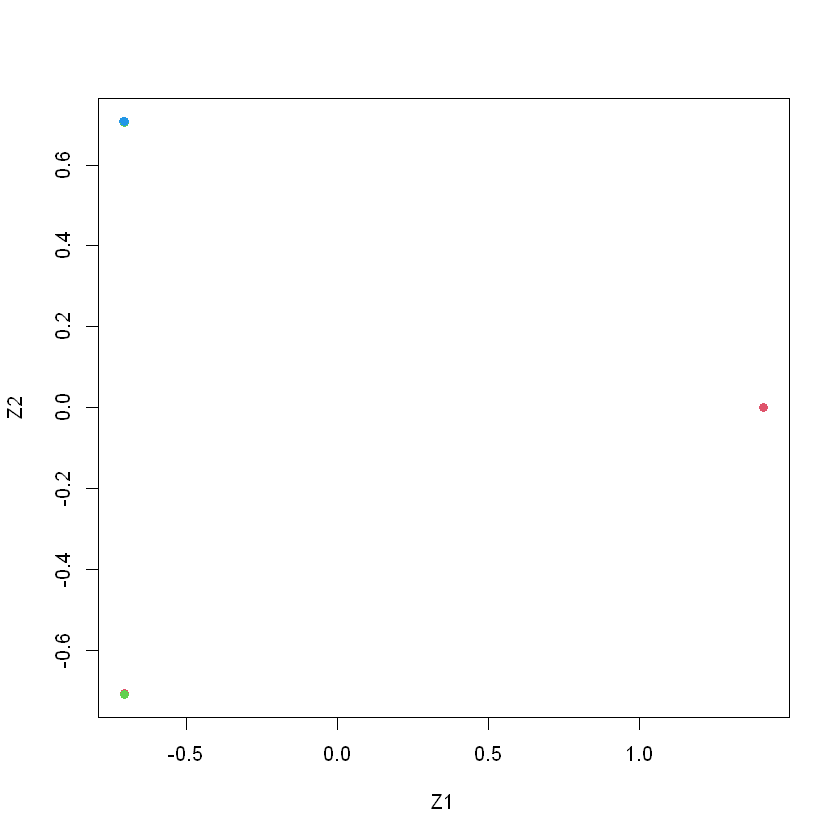

In [78]:
plot(pca.out$x[,1:2], col=2:4, xlab="Z1", ylab="Z2", pch=19)

In [79]:
#c.
km.out = kmeans(x, 3, nstart=20)
data.frame(table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20))))

Var1,Var2,Freq
<fct>,<fct>,<int>
1,1,0
2,1,20
3,1,0
1,2,20
2,2,0
3,2,0
1,3,0
2,3,0
3,3,20


In [80]:
#d.
km.out = kmeans(x, 2, nstart=20)
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [81]:
#e.
km.out = kmeans(x, 4, nstart=20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 3 4 4 3 3 4 4 3 4 3 3 3 4 3 3 4 3 4 4 3

In [82]:
#f.
km.out = kmeans(pca.out$x[,1:2], 3, nstart=20)
data.frame(table(km.out$cluster, c(rep(1,20), rep(2,20), rep(3,20))))

Var1,Var2,Freq
<fct>,<fct>,<int>
1,1,20
2,1,0
3,1,0
1,2,0
2,2,0
3,2,20
1,3,0
2,3,20
3,3,0


In [83]:
#g.
km.out = kmeans(scale(x), 3, nstart=20)
km.out$cluster

[1] 3 3 1 1 3 1 1 1 1 1 3 1 3 3 3 2 1 3 2 1 2 3 1 1 1 2 2 2 1 3 2 2 1 2 2 3 2 3
[39] 2 2 1 1 1 2 1 3 1 1 3 1 2 3 3 2 1 1 1 3 3 1